In [205]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_stock1 = pd.read_csv("../../static/data/cba.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last row to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 3 columns Sentiment RBA FED
# N=3
# df = df_stock_less1.iloc[: , :-N]
df_stock_less1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED,CPI
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEGATIVE,4.98,5.87,168.8
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,4.98,5.87,168.8
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,4.98,5.87,168.8
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,POSITIVE,4.98,5.87,168.8
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,4.98,5.87,168.8


In [3]:
df_stock_less1.shape

(5682, 11)

# Create a Train Test Split

Use `RBA` and "FED' for the y values

In [5]:
X = df_stock_less1[["RBA","FED","CPI"]]
y = df_stock_less1["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5682, 3) (5682, 1)


In [7]:
X

,RBA,FED,CPI
0,4.98,5.87,168.80000
1,4.98,5.87,168.80000
2,4.98,5.87,168.80000
3,4.98,5.87,168.80000
4,4.98,5.87,168.80000
...,...,...,...
5677,0.05,0.08,288.94152
5678,0.05,0.08,288.94152
5679,0.05,0.08,288.94152
5680,0.05,0.08,288.94152


In [211]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [212]:
arr_train = np. array(y_train)
y_train = np. reshape(arr_train, (-1, 1))

arr_test = np. array(y_test)
y_test = np. reshape(arr_test, (-1, 1))
print(y_train.shape,y_test.shape)


(4261, 1) (1421, 1)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [213]:
# Scale your X data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [214]:
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_train_scaled

array([[0.05023435],
       [0.73264615],
       [0.58149367],
       ...,
       [0.67561218],
       [0.09752041],
       [0.44260426]])

In [215]:
print(X_train_scaled.shape, y_train.shape)

(4261, 7) (4261, 1)


# Select your features (columns)

In [216]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_scaled)
print(X_train_scaled.shape, y_train_scaled.shape)

(4261, 7) (4261, 1)


In [217]:
#In X keep all columns
X_train_featured = X_train_scaled[:,[0,1,2,3,4,5]]
X_test_featured = X_test_scaled[:,[0,1,2,3,4,5]]
X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2,3,4,5
0,0.045539,0.048696,0.047885,0.015837,0.039280,0.860111
1,0.730194,0.731689,0.732393,0.608110,0.079477,0.203601
2,0.571909,0.581404,0.569015,0.396540,0.062957,0.349030
3,0.570457,0.573282,0.571817,0.548037,0.066371,0.203601
4,0.621153,0.623612,0.621167,0.501267,0.074850,0.238227
...,...,...,...,...,...,...
4256,0.087671,0.090014,0.090284,0.039368,0.057272,0.653740
4257,0.421567,0.420010,0.418365,0.474811,0.093071,0.015235
4258,0.686154,0.684473,0.678727,0.503781,0.108644,0.272853
4259,0.094940,0.095917,0.094169,0.029015,0.031537,0.857341


In [218]:
print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

(4261, 7) (4261, 1)
(1421, 7) (1421, 1)


# Train the Model

In [219]:
# Created a normal neural network with 6 inputs, 4 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 7)                 56        
                                                                 
 dense_53 (Dense)            (None, 100)               800       
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 100)               10100     
                                                                 
 dense_56 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,157
Trainable params: 21,157
Non-trainable params: 0
_________________________________________________________________


In [220]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [221]:
y_train_scaled.reshape(-1, 1)
y_test_scaled.reshape(-1, 1)

print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

(4261, 7) (4261, 1)
(1421, 7) (1421, 1)


In [222]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 429ms/epoch - 3ms/step
Epoch 2/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 183ms/epoch - 1ms/step
Epoch 3/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 198ms/epoch - 1ms/step
Epoch 4/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 157ms/epoch - 1ms/step
Epoch 5/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 139ms/epoch - 1ms/step
Epoch 6/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 129ms/epoch - 959us/step
Epoch 7/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 133ms/epoch - 991us/step
Epoch 8/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 145ms/epoch - 1ms/step
Epoch 9/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 143ms/epoch - 1ms/step
Epoch 10/10
134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 128ms/epoch - 957us/step


In [223]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train_scaled, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

134/134 - 0s - loss: 0.0000e+00 - accuracy: 2.3469e-04 - 305ms/epoch - 2ms/step
Neural Network - Loss: 0.0, Accuracy: 0.00023468669678550214


In [224]:
print(f"Training Data Score: {model.evaluate(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.evaluate(X_test_scaled, y_test_scaled)}")

134/134 [==============================] - 0s 943us/step - loss: 0.0000e+00 - accuracy: 2.3469e-04
Training Data Score: [0.0, 0.00023468669678550214]
45/45 [==============================] - 0s 995us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Testing Data Score: [0.0, 0.0]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_stock1 = pd.read_csv("../../static/data/cba.csv")#,index_col="Date",parse_dates=True)
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last rows to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]

# SET X and y
# Drop last 3 columns Sentiment RBA FED
N=3
df = df_stock_less1.iloc[: , :-N]

X_data = df.drop("Date", axis=1)
# y_target = df_stock_less1.iloc[:,9:]
y_target = df_stock_less1['RBA']
print(X_data.shape, y_target.shape)
# X_data
y_target

(5682, 6) (5682,)


0       4.98
1       4.98
2       4.98
3       4.98
4       4.98
        ... 
5677    0.05
5678    0.05
5679    0.05
5680    0.05
5681    0.05
Name: RBA, Length: 5682, dtype: float64

In [245]:
#In X_data keep only featured cols 

X_data_featured = X_data.iloc[:,[1,2,3,4,5]]
print(X_data_featured.shape,y_target.shape)

(5682, 5) (5682,)


In [227]:
# Split data and target into training and testing
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data,y_target,test_size=0.4,random_state=42)
print(X_data_train.shape,y_target_train.shape)
print(X_data_test.shape,y_target_test.shape)

(3409, 6) (3409,)
(2273, 6) (2273,)


In [228]:
y_target_train.dtypes

dtype('float64')

In [229]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_data_train)
X_data_train_scaled = X_scaler.transform(X_data_train)
X_data_test_scaled = X_scaler.transform(X_data_test)

# y_scaler = MinMaxScaler().fit(y_target_train)
# y_target_train_scaled = y_scaler.transform(y_target_train)
# y_target_test_scaled = y_scaler.transform(y_target_test)

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [248]:

model_params = {
    # 'n_neighbors' : {
    #     'model' : KNeighborsClassifier(),
    #     'params' : {
    #        'n_neighbors': [3,5,11,19],
    #     #    'weights': ['uniform','distance']
    #     }
    # },
    # 'svm' : {
    #     'model' : svm.SVC(),
    #     'params' : {
    #         'C' : [1,5,10,50],
    #         'kernel': ['rbf','linear'],
    #         'gamma': [0.0001, 0.0005, 0.001, 0.005]
    #     }
    # },
    # 'random_forest': {
    #     'model' : RandomForestClassifier(),
    #     'params' : {
    #         # 'n_estimators': [1,5,10,50,80],
    #         'max_features': ['auto','sqrt'],
    #         'max_depth': [2,4],
    #         'min_samples_split': [2,5],
    #         'min_samples_leaf': [1,2],
    #         'bootstrap': [True,False]
    #     }
    # },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='multinomial'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [249]:
from sklearn.model_selection import GridSearchCV
scores= []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_data_train_scaled, y_target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

c:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\antoi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "c:\Users\antoi\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on thi

ValueError: Unknown label type: 'continuous'

In [ ]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,n_neighbors,0.539657,"{'n_neighbors': 3, 'weights': 'distance'}"
1,svm,0.734144,"{'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}"
2,random_forest,0.547882,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."
3,logistic_regression,0.774389,{'C': 50}


In [ ]:
# Make predictions with the hypertuned model
predictions_clf = clf.predict(X_data_test_scaled)

from sklearn.metrics import classification_report
target_names = ["NEGATIVE 0","NEUTRAL 1","POSITIVE 2"] 
print(classification_report(y_target_test_encoded, predictions_clf, target_names=target_names))

              precision    recall  f1-score   support

  NEGATIVE 0       0.83      0.72      0.77      1042
   NEUTRAL 1       0.00      0.00      0.00        51
  POSITIVE 2       0.76      0.88      0.81      1177

    accuracy                           0.78      2270
   macro avg       0.53      0.53      0.53      2270
weighted avg       0.77      0.78      0.77      2270



C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


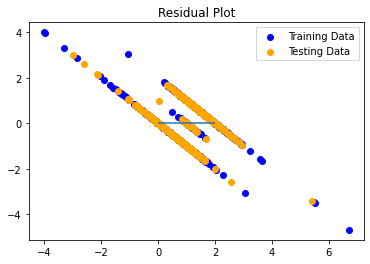

In [ ]:
# LinearRegression model: fit it to the scaled training data
from sklearn.linear_model import LinearRegression
modelLG1 = LinearRegression()
modelLG1.fit(X_data_train_scaled, y_target_train_encoded)

# Make predictions using fitted model
predictions1 = modelLG1.predict(X_data_test_scaled)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(modelLG1.predict(X_data_train_scaled), y_target_train_encoded - modelLG1.predict(X_data_train_scaled), c="blue", label="Training Data")
plt.scatter(modelLG1.predict(X_data_test_scaled), y_target_test_encoded - modelLG1.predict(X_data_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_target_test_encoded.min(), xmax=y_target_test_encoded.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'antoinetteboyle.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://eaffd8bb-9e6f-4c87-a605-1b1e126d58d9/assets


['antoinetteboyle.sav']